In [7]:
suppressWarnings(suppressMessages({
    library(Signac)
    library(Seurat)
    library(EnsDb.Mmusculus.v79)
    library(Signac)
    library(Seurat)
    library(GenomicRanges)
    library(future)
    library(ggplot2)
}))

In [8]:
counts <- Read10X_h5("/SGRNJ06/randd/PROJECT/scATAC/project/self_pipe/P23121502_zhongshan/20240102/C57_MK_X1/outs/C57_MK_X1_filtered_peak_count.h5")
metadata <- read.csv(
  file = "/SGRNJ06/randd/PROJECT/scATAC/project/self_pipe/P23121502_zhongshan/20240102/C57_MK_X1/outs/cell_qc_metrics.tsv",
  header = TRUE,
  row.names = 1,
  sep='\t'
)

brain_assay <- CreateChromatinAssay(
  counts = counts,
  sep = c("_", "_"),
  # genome = "mm10",
  fragments = '/SGRNJ06/randd/PROJECT/scATAC/project/self_pipe/P23121502_zhongshan/20240102/C57_MK_X1/02.atac/Result/Mapping/C57_MK_X1/fragments_corrected_dedup_count.tsv.gz',
)

Computing hash



In [ ]:
brain <- CreateSeuratObject(
  counts = brain_assay,
  assay = 'peaks',
  project = 'ATAC',
  meta.data = metadata
)

In [ ]:
# extract gene annotations from EnsDb
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79)

# change to UCSC style since the data was mapped to hg19
seqlevels(annotations) <- paste0('chr', seqlevels(annotations))
genome(annotations) <- "mm10"

# add the gene information to the object
Annotation(brain) <- annotations

In [ ]:
brain <- NucleosomeSignal(object = brain)

In [ ]:
brain <- TSSEnrichment(brain, fast = FALSE)

In [ ]:
brain$high.tss <- ifelse(brain$TSS.enrichment > 2, 'High', 'Low')
TSSPlot(brain, group.by = 'high.tss') + NoLegend() + ggtitle("Enrichment around TSS")

In [ ]:
TSSPlot(brain) + NoLegend() + ggtitle("Enrichment around TSS")

In [ ]:
p = TSSPlot(brain) + NoLegend() + ggtitle("Enrichment around TSS")

In [ ]:
ggsave(filename = "/SGRNJ06/randd/USER/cjj/celedev/atac/MAESTRO/test/20240307tssplot/C57_MK_X1.png", height = 7, width = 7, plot = p)

In [ ]:
df = as.data.frame(brain@assays$peaks@positionEnrichment)

In [ ]:
max(colMeans(df))

In [ ]:
df

In [ ]:
write.csv(df, "/SGRNJ06/randd/USER/cjj/celedev/atac/MAESTRO/test/20240326tss/tss.csv", quote=FALSE, row.names=FALSE) 

In [38]:
# 人
suppressWarnings(suppressMessages({
    library(Signac)
    library(Seurat)
    library(EnsDb.Mmusculus.v79)
    library(EnsDb.Hsapiens.v86)
    library(GenomicRanges)
    library(future)
    library(ggplot2)
}))

In [ ]:
counts1 <- Read10X_h5("/SGRNJ06/randd/USER/cjj/celedev/atac/MAESTRO/test/20240402bulk/CCRF/outs/CCRF_filtered_peak_count.h5")

In [ ]:
head(counts1)

In [32]:
head(counts)

6 x 1 sparse Matrix of class "dgCMatrix"
                          AACAATAACGTCTCCAAGGA
chr10_100009549_100010221                    4
chr10_100014040_100014698                  -66
chr10_100020511_100021124                   82
chr10_100043513_100043593                   11
chr10_100045960_100046445                   65
chr10_100109586_100109946                   38

In [39]:
counts <- Read10X_h5("/SGRNJ06/randd/USER/cjj/celedev/atac/MAESTRO/test/20240402bulk//CCRF//outs//CCRF_filtered_peak_count.h5")
metadata <- read.csv(
  file = "/SGRNJ06/randd/USER/cjj/celedev/atac/MAESTRO/test/20240402bulk/CCRF/outs/cell_qc_metrics.tsv",
  header = TRUE,
  row.names = 1,
  sep='\t'
)

brain_assay <- CreateChromatinAssay(
  counts = counts,
  sep = c("_", "_"),
  min.cells = 0,
  min.features = 0,
  fragments = '/SGRNJ06/randd/USER/cjj/celedev/atac/MAESTRO/test/20240402bulk/CCRF/outs/fragments_corrected_dedup_count.tsv.gz',
)

Computing hash



In [40]:
brain <- CreateSeuratObject(
  counts = brain_assay,
  assay = 'peaks',
  project = 'ATAC',
  meta.data = metadata
)

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from peaks to peaks_"


In [ ]:
# extract gene annotations from EnsDb
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v86)

# change to UCSC style since the data was mapped to hg19
seqlevels(annotations) <- paste0('chr', seqlevels(annotations))
genome(annotations) <- "hg38"

# add the gene information to the object
Annotation(brain) <- annotations

In [42]:
brain <- NucleosomeSignal(object = brain)

In [43]:
brain <- TSSEnrichment(brain, fast = FALSE)

Extracting TSS positions

Finding + strand cut sites

Finding - strand cut sites

Computing mean insertion frequency in flanking regions

Normalizing TSS score



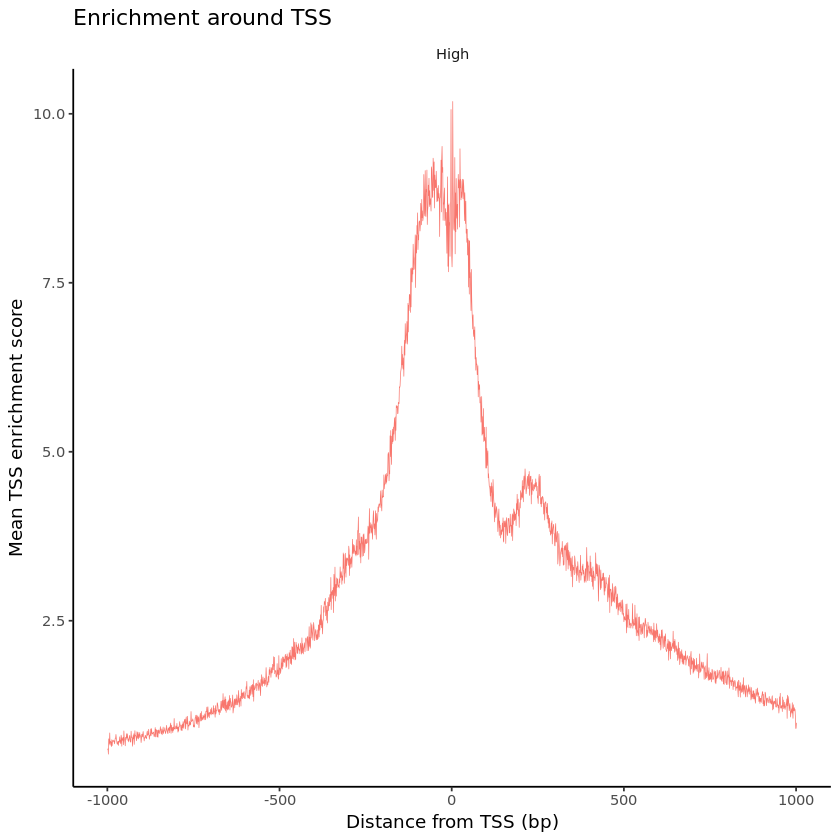

In [44]:
brain$high.tss <- ifelse(brain$TSS.enrichment > 3, 'High', 'Low')
TSSPlot(brain, group.by = 'high.tss') + NoLegend() + ggtitle("Enrichment around TSS")

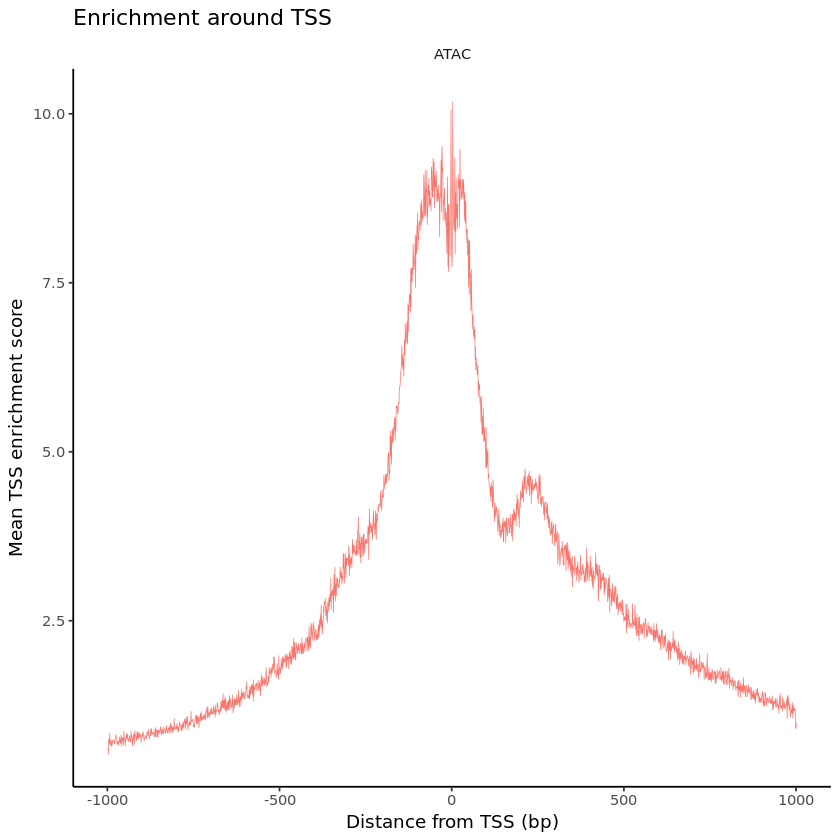

In [45]:
TSSPlot(brain) + NoLegend() + ggtitle("Enrichment around TSS")

In [46]:
p = TSSPlot(brain) + NoLegend() + ggtitle("Enrichment around TSS")

In [47]:
ggsave(filename = "/SGRNJ06/randd/USER/cjj/celedev/atac/MAESTRO/test/20240307tssplot/CCRF.png", height = 7, width = 7, plot = p)

In [48]:
df = as.data.frame(brain@assays$peaks@positionEnrichment)

In [52]:
max(colMeans(df))

[1] 5.340931

In [50]:
df

,TSS..999,TSS..998,TSS..997,TSS..996,TSS..995,TSS..994,TSS..993,TSS..992,TSS..991,TSS..990,⋯,TSS.992,TSS.993,TSS.994,TSS.995,TSS.996,TSS.997,TSS.998,TSS.999,TSS.1000,TSS.1001
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AACAATAACGTCTCCAAGGA,0.5856533,0.6075697,0.5418206,0.7439380,0.6867120,0.7086283,0.8547373,0.6514023,0.7341974,0.7268920,⋯,1.286976,1.167654,1.178612,1.192005,1.159131,1.183482,1.083641,0.9156160,0.8985700,0.9886705
CACACAATTCCTGCATCATC,0.5912454,0.6046001,0.5111177,0.7599993,0.6616607,0.6992965,0.8243443,0.6653029,0.6980824,0.6871559,⋯,1.226197,1.166708,1.172778,1.233481,1.171564,1.189775,1.063513,0.8971876,0.9178266,0.9906700
expected,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,⋯,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000000,1.0000000,1.0000000
motif,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.0000000,0.0000000


In [54]:
max(df)

[1] 10.20814